# Recovery of Heard Speech Spectrograms

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Code for Augmented Lagrangian Method
def ALM(A,y,u,alpha,iters):
    m,n = np.shape(A)
    # initialise x and v of Augmented Lagrangian
    x = np.zeros(n)
    v = np.zeros(m)
    
    # do iterative updates
    err = []
    for k in range(iters):
        descent = x - alpha*u*np.dot(A.T,np.dot(A,x)-y) - alpha*np.dot(v,A)
        
        x = np.sign(descent)*np.maximum(np.abs(descent)-1,0)     # prox step
        v = v + u*(np.dot(A,x)-y)
        err.append(np.linalg.norm(np.dot(A,x)-y))
        
    return x,v,err

# Code for accelerated proximal gradient
def acc_prox_grad(A,y,alpha,beta,lamda,iters):
    m,n = np.shape(A)
    xprev = np.zeros(n)
    x = np.zeros(n)
    p = np.zeros(n)
    
    err = []
    for k in range(iters):
        p = x + beta*(x - xprev)
        xprev = x
        descent = p - alpha*np.dot(A.T,np.dot(A,p)-y)
        x = np.sign(descent)*np.maximum(np.abs(descent)-alpha*lamda,0)
        err.append(np.linalg.norm(np.dot(A,x)-y))
        
    return x,v,err

def proj_subgrad(A,y,t,iters):
    m,n = np.shape(A)
    x = np.zeros(n)
    z = np.zeros(n)
    
    err = []
    for k in range(iters):
        z = x - t*np.sign(x)
        x = z - np.dot( np.dot(A.T, np.linalg.inv(np.dot(A,A.T)) ), np.dot(A,z)-y )
        err.append(np.linalg.norm(np.dot(A,x)-y))
        
    return x,v,err

def FrankWolfe(A,y,tau,gamma,iters):
    m,n = np.shape(A)
    x = np.zeros(n)
    v = np.zeros(n)
    
    err = []
    for k in range(iters):
        grad = np.dot(A.T,np.dot(A,x)-y)
        v = -tau*np.sign(grad)*np.array(np.abs(grad)==np.max(np.abs(grad))) #l_inf norm (to find one of the extreme points of L1 ball)
        x = gamma*x + (1-gamma)*v
        err.append(np.linalg.norm(np.dot(A,x)-y))
        
    return x,v,err

1.1639912982514882


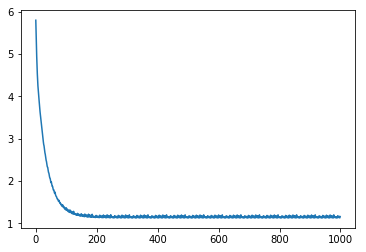

In [147]:
tau = 1.8
gamma = 0.97
x,v,err = FrankWolfe(A,y,tau,gamma,iters=1000)
plt.plot(err)
print(err[-1])

5.75922172262796e-08


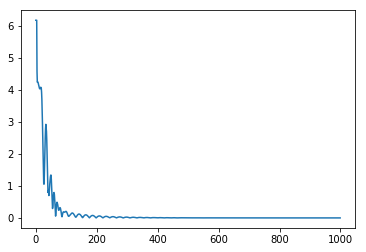

In [2]:
A = np.array([[1,-2,1,5,2,3],[3,1,4,8,4,6],[-1,1,3,1,9,5]],dtype=float)
y = np.array([-2,5,3],dtype=float)
u = 7
alpha = 8e-4
x,v,err = ALM(A,y,u,alpha,iters=1000)
plt.plot(err)
print(err[-1])

0.0007367879963025015


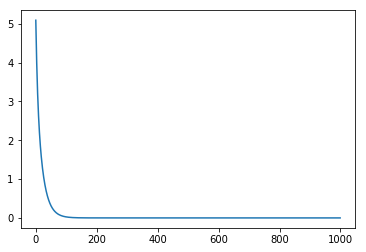

In [34]:
alpha = 7e-3
beta = 1e-1
lamda = 1e-3
x,v,err = acc_prox_grad(A,y,alpha,beta,lamda,iters=1000)
plt.plot(err)
print(err[-1])

0.0


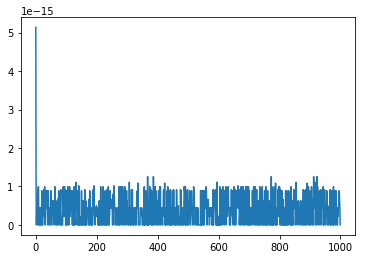

In [48]:
t = 1e-2
x,v,err = proj_subgrad(A,y,t,iters=1000)
plt.plot(err)
print(err[-1])